### Dijkstra's Algorithm

&nbsp;

Dijkstra's Algorithm is a famous algorithm named after its inventor, a Turin Award laureate. The structure is somewhat similar to Breadth First Search. A profound understanding of BFS is definitely beneficial to the study of Dijkstra's Algorithm. Previously, we have tested BFS and DFS in unweighted DCG. This time, we use weighted DCG. Each weight denotes the distance from one vertex to another. Dijkstra's Algorithm will help us find the shortest path from point A to point B with the minimum weights.

&nbsp;

In [15]:
import os
#graph adt
#check the below link for more details
# https://github.com/je-suis-tm/graph-theory/blob/master/graph.py
import graph

In [33]:
#create graph adt
ADT=graph.graph()

ADT.append(1,2,1)
ADT.append(1,3,2)
ADT.append(2,4,2)
ADT.append(2,5,2)
ADT.append(3,5,1)
ADT.append(4,2,2)
ADT.append(4,6,3)
ADT.append(5,2,2)
ADT.append(5,6,1)
ADT.append(6,3,1)
ADT.append(6,4,3)

ADT.reveal()

{1: {2: 1, 3: 2},
 2: {4: 2, 5: 2},
 3: {5: 1},
 4: {2: 2, 6: 3},
 5: {2: 2, 6: 1},
 6: {3: 1, 4: 3}}

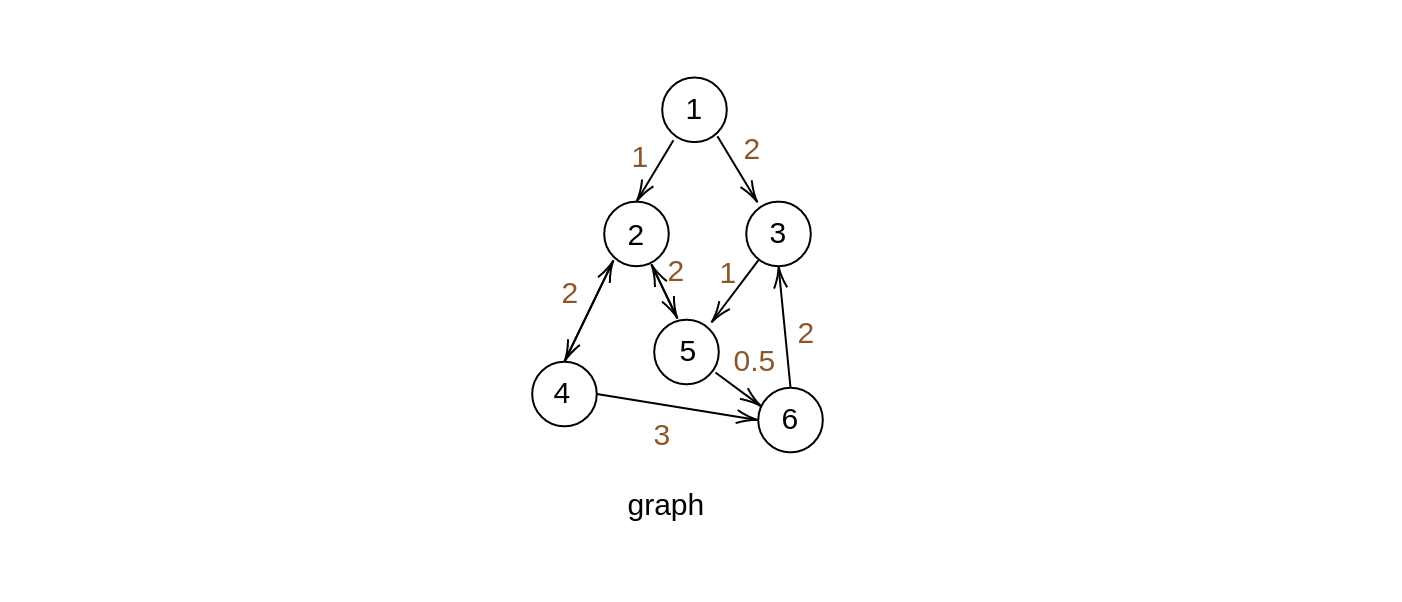

In [36]:
## dijkstra requires a lot of space to execute
## this implementation search for the shortest from start to end node. 
## but one could compute paths from all node until de end

def dijkstra(ADT,start,end):
    """Dijkstra's Algorithm"""
    
    #all weights in dcg must be positive 
    #otherwise we have to use bellman ford instead
    # https://github.com/je-suis-tm/graph-theory/blob/master/bellman_ford%20forex%20arbitrage.ipynb
    neg_check=[j for i in ADT.reveal() for j in ADT.reveal()[i].values()]
    assert min(neg_check)>=0,"negative weights are not allowed, please use Bellman-Ford"
    
    #queue in dijkstra is similar to the queue in bfs
    #except when we pop items from queue
    #we pop the item with the minimum weight
    #thats why queue is a dict here rather than a list
    #ideally we should use priority queue
    queue={}
    queue[start]=0
    
    #distance is also a dictionary
    #it keeps track of distance from starting vertex to any vertex
    #before we start any iteration
    #we initialize all distances from start to any vertices to infinity
    #we set the distance[start] to zero
    distance={}
    for i in ADT.vertex():
        distance[i]=float('inf')
    distance[start]=0
        
    #pred is a dict as well
    #it keeps track of how we get to the current vertex
    #each time we update distance, we update the predecessor vertex
    #in the end, we can obtain the detailed path from start to end
    pred={}
        
    #for each iteration, we select a vertex with the minimum weight
    #we attempt to find the shortest path from the start to the current vertex
    #eventually we get the optimal result which is the shortest path
    #the logic is simple, similar to dynamic programming
    #if the path from start to end is optimal
    #the path from start to any vertex along the path 
    #should be the optimal as well
    #details about dynamic programming are in the following link
    # https://github.com/je-suis-tm/recursion-and-dynamic-programming/blob/master/knapsack.jl
    while queue:
        
        #vertex with the minimum weight in queue
        current=min(queue,key=queue.get)
        queue.pop(current)
        
        for j in ADT.edge(current):
            
            #check if the current vertex can construct the optimal path
            if distance[current]+ADT.weight(current,j)<distance[j]:
                distance[j]=distance[current]+ADT.weight(current,j)
                pred[j]=current
            
            #add child vertex to the queue
            if ADT.go(j)==0 and j not in queue:
                queue[j]=distance[j]
        
        #each vertex is visited only once
        ADT.visit(current)
        
        #traversal ends when the target is met
        #if current==end:
            #break
    
    #create the shortest path by backtracking
    #trace the predecessor vertex from end to start
    previous=end
    path=[]
    while pred:
        path.insert(0, previous)
        if previous==start:
            break
        previous=pred[previous]
    
    #note that if we cant go from start to end
    #we may get inf for distance[end]
    #additionally, the path may not include start position
    return distance[end],path

In [35]:
ADT.clear(whole=True)
print('minimum cost: %d, path: %s'%dijkstra(ADT,1,6))

ADT.clear(whole=True)
print('minimum cost: %d, path: %s'%dijkstra(ADT,3,4))

minimum cost: 4, path: [1, 2, 5, 6]
minimum cost: 5, path: [3, 5, 6, 4]


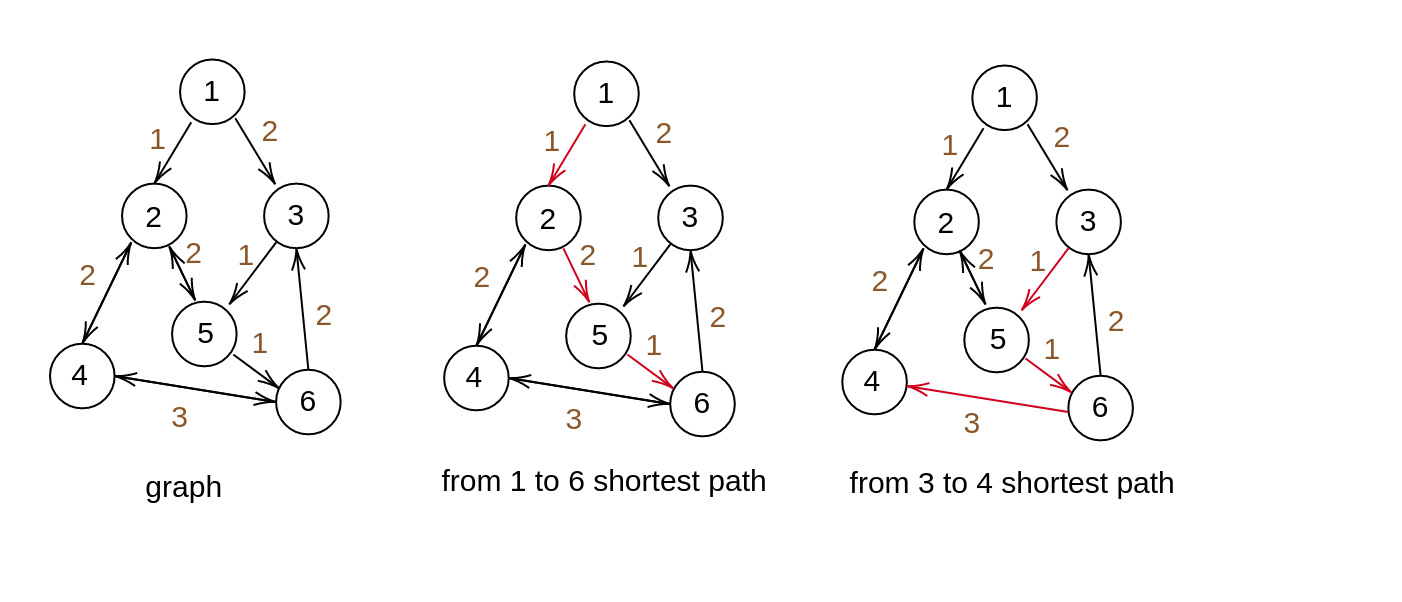